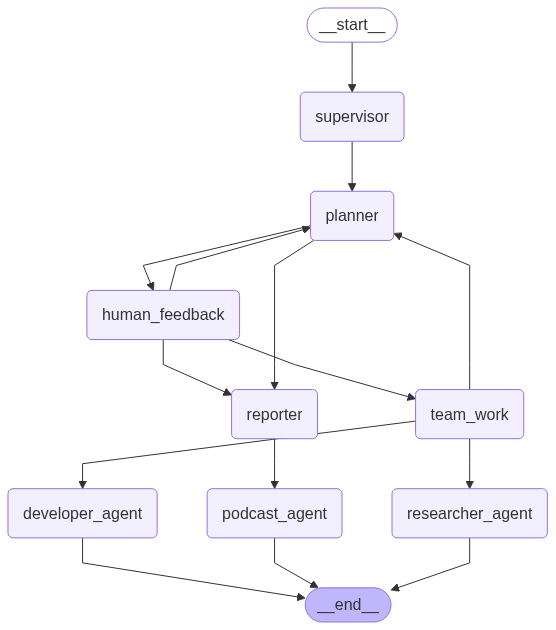

In [21]:
from IPython.display import Image
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END

class State(TypedDict):
    "State to manage all chats"

def custom_node(
    state: State,
):
    "Custom Node"

# Initialize the graph builder with a state
builder = StateGraph(State)
builder.add_node("supervisor", custom_node)
builder.add_node("planner", custom_node)
builder.add_node("reporter", custom_node)
builder.add_node("team_work", custom_node)
builder.add_node("researcher_agent", custom_node)
builder.add_node("developer_agent", custom_node)
builder.add_node("human_feedback", custom_node)
builder.add_node("podcast_agent", custom_node)

builder.add_edge(START, "supervisor")
    
builder.add_edge("supervisor", "planner")
builder.add_edge("supervisor", END)
    
builder.add_edge("planner", "reporter")
builder.add_edge("planner", "human_feedback")
    
builder.add_edge("human_feedback", "reporter")
builder.add_edge("human_feedback", "team_work")
builder.add_edge("human_feedback", "planner")
builder.add_edge("human_feedback", END)
    
builder.add_edge("team_work", "planner")
builder.add_edge("team_work", "developer_agent")
builder.add_edge("team_work", "researcher_agent")
    
builder.add_edge("reporter", "podcast_agent")
builder.add_edge("podcast_agent", END)
# Compile the graph
workflow = builder.compile()

Image(workflow.get_graph().draw_mermaid_png(padding=20),width=4096, height=4096)